In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sys
import config

sys.path.append('model_building/create_image_folders.py')
from model_building.create_image_folders import * 
sys.path.append('model_building/keras_model.py')
from model_building.keras_model import *

import warnings
warnings.simplefilter("ignore", UserWarning)

## Load Data

In [2]:
## Set paths
img_folder = r"C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/images/"
train_img = "C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/train/"
val_img = "C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/val/"
labels_image = "data/ai_ready/x-ai_data.csv"

## Create Subfolder

Use the fonction "subfolders" to do the same thing as the cells below, DO NOT run it twice to avoid duplicates

In [36]:
train = labels_image.loc[labels_image['split']=='train']
val = labels_image.loc[labels_image['split']=='validation']

In [37]:
train0 = train.loc[train['class']==0]
train1 = train.loc[train['class']==1]

val0 = val.loc[val['class']==0]
val1 = val.loc[val['class']==1]


In [41]:
#Move TRAIN images labeled 0 to the correct folder

for i in train0.index:
    im = cv2.imread(img_folder+train0.loc[i,'filename'])
    cv2.imwrite(train_img + '0/' +train0.loc[i,'filename'], im)
#Move TRAIN images labeled 1 to the correct folder
for i in train1.index:
    im = cv2.imread(img_folder+train1.loc[i,'filename'])
    cv2.imwrite(train_img+'1/' +train1.loc[i,'filename'], im)

In [40]:
#Move val images labeled 0 to the correct folder
for i in val0.index:
    im = cv2.imread(img_folder+val0.loc[i,'filename'])
    cv2.imwrite(val_img + '0/' +val0.loc[i,'filename'], im)
#Move val images labeled 1 to the correct folder
for i in val1.index:
    im = cv2.imread(img_folder+val1.loc[i,'filename'])
    cv2.imwrite(val_img+'1/' +val1.loc[i,'filename'], im)

In [63]:
import shutil

#Remove hidden file
shutil.rmtree("image/train/.ipynb_checkpoints")
shutil.rmtree("image/val/.ipynb_checkpoints")

## Model

In [3]:
## Train and Val dataset
train_ds = train_set(train_img, config.image_size, config.batch_size)
val_ds = val_set(val_img, config.image_size, config.batch_size)

Found 1399 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


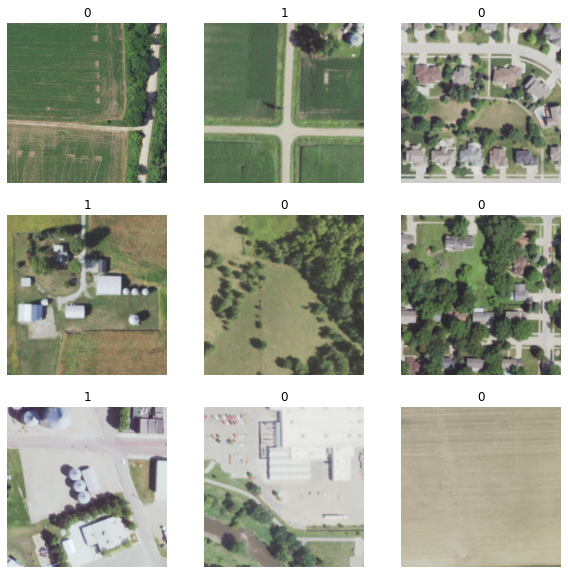

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

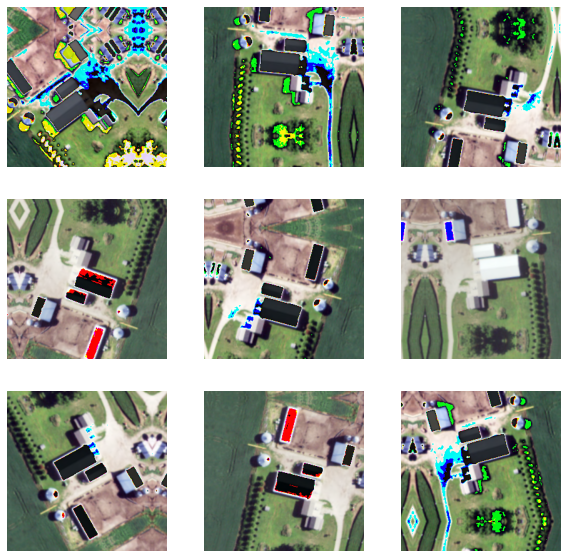

In [15]:
#visualize data augmentation
data_augmentation = keras.Sequential(
     [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomContrast([0,1]),
        layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
    ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [74]:
## Model
model = make_model(input_shape=config.image_size + (3,), num_classes=2)

In [75]:
train_model(model, train_ds, val_ds, config.number_epochs)

Epoch 1/25
6/6 [==============================] - ETA: 0s - loss: 0.9708 - accuracy: 0.6126

/opt/conda/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


6/6 [==============================] - 15s 2s/step - loss: 0.9708 - accuracy: 0.6126 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 2/25
6/6 [==============================] - 14s 2s/step - loss: 0.6087 - accuracy: 0.6962 - val_loss: 0.6928 - val_accuracy: 0.5150
Epoch 3/25
6/6 [==============================] - 13s 2s/step - loss: 0.4840 - accuracy: 0.7748 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 4/25
6/6 [==============================] - 13s 2s/step - loss: 0.4024 - accuracy: 0.8256 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 5/25
6/6 [==============================] - 13s 2s/step - loss: 0.3727 - accuracy: 0.8377 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 6/25
6/6 [==============================] - 13s 2s/step - loss: 0.3601 - accuracy: 0.8620 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 7/25
6/6 [==============================] - 13s 2s/step - loss: 0.3179 - accuracy: 0.8706 - val_loss: 0.6928 - val_accuracy: 0.5150
Epoch 8/25
6/6 [=============================